In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


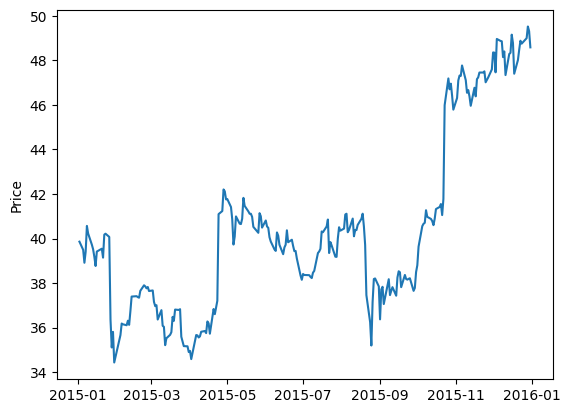

In [4]:
start = "2015-01-01"
end = "2016-01-01"
pricing_sample = yf.download('MSFT',start=start,end=end)['Close']['MSFT']

#transform it into returns
returns_sample = pricing_sample.pct_change()[1:]

# plot it
plt.plot(pricing_sample.index, pricing_sample.values)
plt.ylabel('Price');

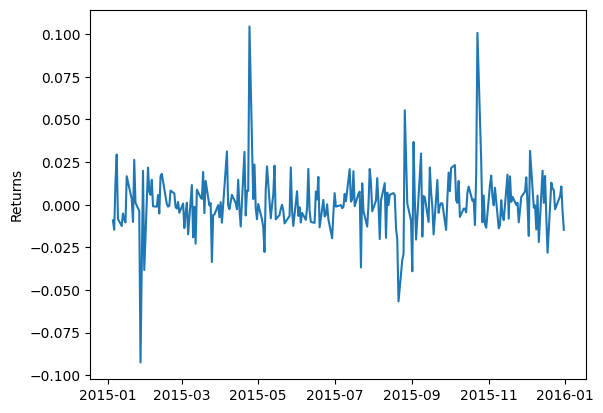

In [5]:
plt.plot(returns_sample.index, returns_sample.values)
plt.ylabel('Returns');

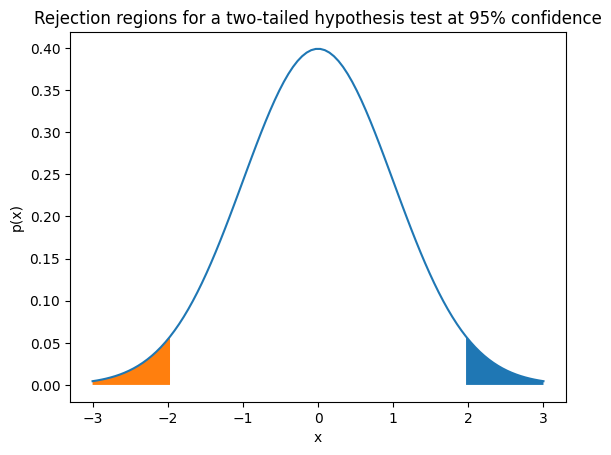

In [6]:
x = np.linspace(-3,3,100)
norm_pdf = lambda x: (1/np.sqrt(2*np.pi)) * np.exp(-x*x/2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)
ax.fill_between(x, 0, y, where = x > 1.96)
ax.fill_between(x, 0, y, where = x < -1.96)
plt.title('Rejection regions for a two-tailed hypothesis test at 95% confidence')
plt.xlabel('x')
plt.ylabel('p(x)');

In [ ]:
n = len(returns_sample)
test_statistic = ((returns_sample.mean() - 0) /
                (returns_sample.std()/np.sqrt(n)))
print(f't test statistic: {test_statistic}') # 0.8411239585831457

t test statistic: 0.8411239585831457


In [ ]:
from scipy.stats import t
p_val = 2 * (1 - t.cdf(test_statistic, n - 1))
print(f'P-value is: {p_val}') # 0.4010822933187539

P-value is: 0.4010822933187539


[*********************100%***********************]  2 of 2 completed


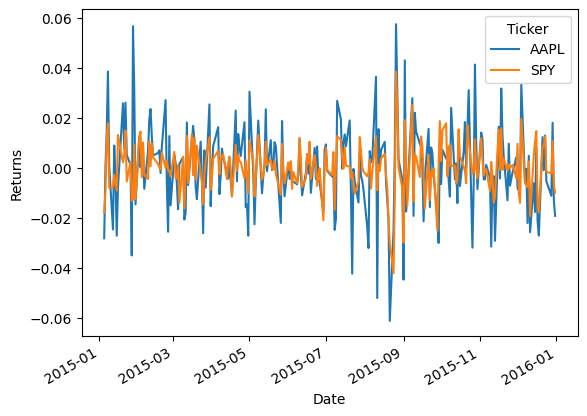

In [13]:
symbol_list = ["SPY", "AAPL"]
start = '2015-01-01'
end = '2016-01-01'
pricing_sample = yf.download(symbol_list,start=start,end=end)['Close']
returns_sample = pricing_sample.pct_change()[1:]

returns_sample.plot()
plt.ylabel('Returns');

In [14]:
# Sample mean values
mu_spy, mu_aapl = returns_sample.mean()
s_spy, s_aapl = returns_sample.std()
n_spy = len(returns_sample['SPY'])
n_aapl = len(returns_sample['AAPL'])

test_statistic = ((mu_spy - mu_aapl) - 0)/((s_spy**2/n_spy) + (s_aapl**2/n_aapl))**0.5
df = ((s_spy**2/n_spy) + (s_aapl**2/n_aapl))**2/(((s_spy**2 / n_spy)**2 /n_spy)+((s_aapl**2 / n_aapl)**2/n_aapl))

print(f't test statistic: {test_statistic}')
print(f'Degrees of freedom (modified): {df}')

t test statistic: -0.03289362388386259
Degrees of freedom (modified): 401.6764460283518


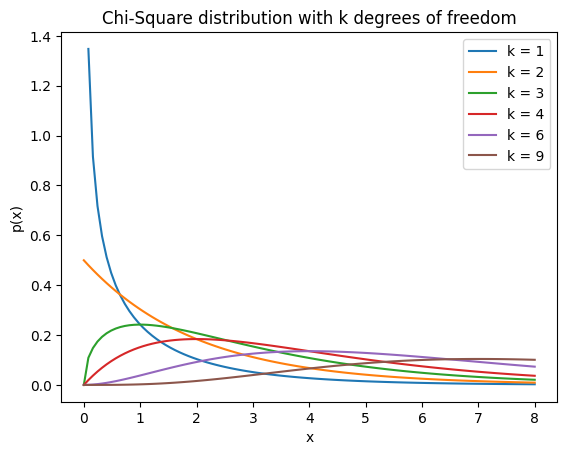

In [15]:
from scipy.stats import chi2
# Here we show what a chi-square looks like
x = np.linspace(0, 8, 100)
y_1 = chi2.pdf(x, 1)
y_2 = chi2.pdf(x, 2)
y_3 = chi2.pdf(x, 3)
y_4 = chi2.pdf(x, 4)
y_6 = chi2.pdf(x, 6)
y_9 = chi2.pdf(x, 9)

fig, ax = plt.subplots()
ax.plot(x, y_1, label = 'k = 1')
ax.plot(x, y_2, label = 'k = 2')
ax.plot(x, y_3, label = 'k = 3')
ax.plot(x, y_4, label = 'k = 4')
ax.plot(x, y_6, label = 'k = 6')
ax.plot(x, y_9, label = 'k = 9')
ax.legend()
plt.title('Chi-Square distribution with k degrees of freedom')
plt.xlabel('x')
plt.ylabel('p(x)');

[*********************100%***********************]  1 of 1 completed


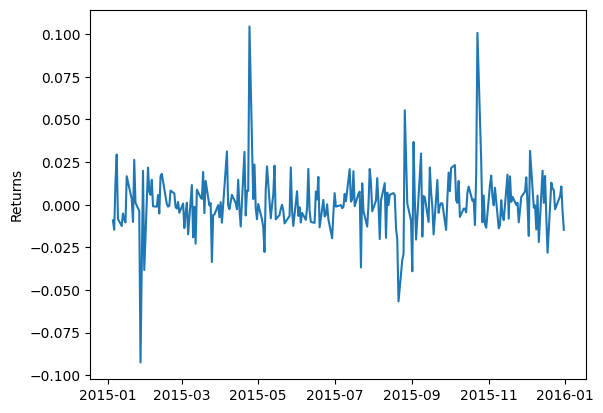

In [16]:
start = "2015-01-01"
end = "2016-01-01"
pricing_sample = yf.download('MSFT',start=start,end=end)['Close']['MSFT']
returns_sample = pricing_sample.pct_change()[1:]
plt.plot(returns_sample.index, returns_sample.values)
plt.ylabel('Returns');

In [17]:
test_statistic = (len(returns_sample) - 1) * returns_sample.std()**2 / 0.0001
print(f'Chi-square test statistic: {test_statistic}')

Chi-square test statistic: 792.0983793804352


In [18]:
# Here we calculate the critical value directly because our df is too high for most chisquare tables
crit_value = chi2.ppf(0.99, len(returns_sample) - 1)
print(f'Critical value of at a = 0.01 with 251 df:{crit_value}')

Critical value of at a = 0.01 with 251 df:304.9395557339572


In [20]:
symbol_list = ["SPY", "AAPL"]
start = '2015-01-01'
end = '2016-01-01'
pricing_sample = yf.download(symbol_list,start=start,end=end)['Close']
returns_sample = pricing_sample.pct_change()[1:]

[*********************100%***********************]  2 of 2 completed


In [21]:
# Take returns from above, AAPL and SPY, and compare their variances
spy_std_dev, aapl_std_dev = returns_sample.std()
print(f'SPY standard deviation is: {spy_std_dev}')
print(f'AAPL standard deviation is: {aapl_std_dev}')


SPY standard deviation is: 0.016865758152925934
AAPL standard deviation is: 0.00974053942230508


In [22]:
test_statistic = (aapl_std_dev / spy_std_dev)**2
print(f'F Test statitic: {test_statistic}')

F Test statitic: 0.3335448810324365


In [23]:
# Since these values are taken over the same time period, they will have the same number of degrees of freedom
df1 = len(returns_sample['AAPL']) - 1
df2 = len(returns_sample['SPY']) - 1

print(f"Degrees of freedom for SPY: {df2}")
print(f"Degrees of freedom for AAPL: {df1}")

Degrees of freedom for SPY: 250
Degrees of freedom for AAPL: 250


In [ ]:
from scipy.stats import f


upper_crit_value = f.ppf(0.975, df1, df2)
lower_crit_value = f.ppf(0.025, df1, df2)
print(f"Upper critical value at a = 0.05 with df1 = {df1} and df2 = {df2}: {upper_crit_value}")
print(f"Lower critical value at a = 0.05 with df1 = {df1} and df2 = {df2}: {lower_crit_value}")

Upper critical value at a = 0.05 with df1 = 250 and df2 = 250: 1.2820806494835295
Lower critical value at a = 0.05 with df1 = 250 and df2 = 250: 0.7799821332634866
